In [1]:
from netCDF4 import Dataset

file_path = "<YOUR_FILEPATH>" 
dataset = Dataset(file_path, mode='r')

print(f"File Metadata:\n{dataset}")
print("\nVariables in the file:\n", dataset.variables.keys())  

dataset.close()


File Metadata:
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Mon Aug 12 02:24:59 2024 GMT
    Comment: GMAO filename: d5124_m2_jan10.inst3_3d_asm_Np.20240801.nc4
    Filename: MERRA2_400.inst3_3d_asm_Np.20240801.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2I3NPASM
    GranuleID: MERRA2_400.inst3_3d_asm_Np.20240801.nc4
    ProductionDateTime: Original file generated: Mon Aug 12 02:24:59 2024 GMT
    LongName: MERRA2 inst3_3d_asm_Np: 3d,3-Hourly,Instantaneous,Pressure-Level,Assimilation,Assimilated Meteorological Fields
    Title: MERRA2 inst3_3d_asm_Np: 3d,3-Hourly,Instantaneous,Pressure-Level,Assimilation,Assimilated Meteorological Fields
    

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

dataset = Dataset(file_path, mode='r')

# Define target region (Example: Eastern US)
lat_range = [25, 50]  # Latitude bounds
lon_range = [-100, -70]  # Longitude bounds

# Extract lat/lon indices
lat_vals = dataset.variables['lat'][:]
lon_vals = dataset.variables['lon'][:]
lat_idx = np.where((lat_vals >= lat_range[0]) & (lat_vals <= lat_range[1]))[0]
lon_idx = np.where((lon_vals >= lon_range[0]) & (lon_vals <= lon_range[1]))[0]

# Select a mid-pressure level (e.g., 500 hPa)
lev_idx = np.abs(dataset.variables['lev'][:] - 500).argmin()

# Extract relevant variables at the first time step
time_step = 0  # First available time
temperature = dataset.variables['T'][time_step, lev_idx, lat_idx, :][:, lon_idx]
humidity = dataset.variables['RH'][time_step, lev_idx, lat_idx, :][:, lon_idx]
wind_u = dataset.variables['U'][time_step, lev_idx, lat_idx, :][:, lon_idx]
wind_v = dataset.variables['V'][time_step, lev_idx, lat_idx, :][:, lon_idx]

dataset.close()


/opt/homebrew/anaconda3/envs/311_env/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/homebrew/anaconda3/envs/311_env/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


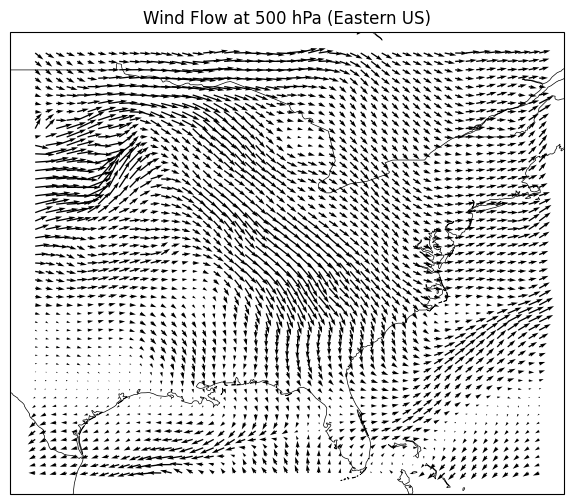

In [8]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.quiver(lon_vals[lon_idx], lat_vals[lat_idx], wind_u, wind_v, transform=ccrs.PlateCarree(), scale=500)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
plt.title("Wind Flow at 500 hPa (Eastern US)")
plt.show()

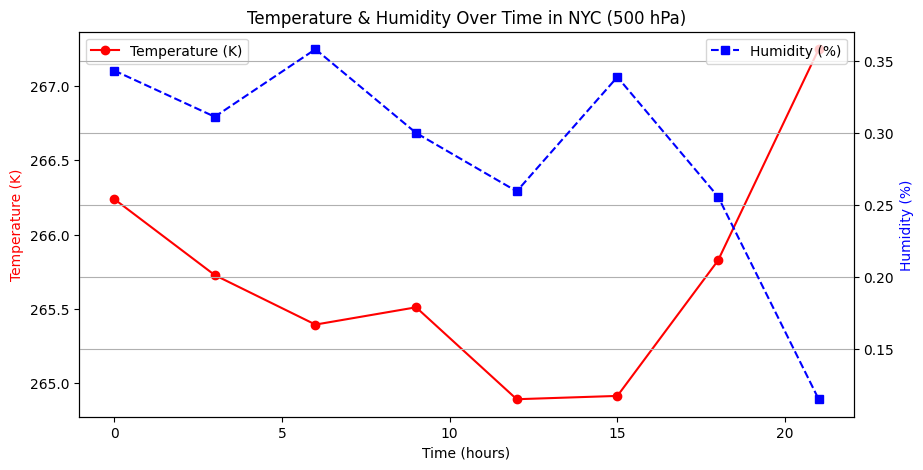

In [9]:
dataset = Dataset(file_path, mode='r')

# NYC Coordinates
target_lat, target_lon = 40.7, -74.0
lat_idx = np.abs(dataset.variables['lat'][:] - target_lat).argmin()
lon_idx = np.abs(dataset.variables['lon'][:] - target_lon).argmin()

# Extract time-series data
time_series_temp = dataset.variables['T'][:, lev_idx, lat_idx, lon_idx]
time_series_humid = dataset.variables['RH'][:, lev_idx, lat_idx, lon_idx]

# Convert time steps (3-hour intervals)
time_steps = np.arange(len(time_series_temp)) * 3  # Hours

# Close dataset
dataset.close()

# Plot Temperature & Humidity
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(time_steps, time_series_temp, color="red", marker="o", linestyle="-", label="Temperature (K)")
ax2.plot(time_steps, time_series_humid, color="blue", marker="s", linestyle="--", label="Humidity (%)")

ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Temperature (K)", color="red")
ax2.set_ylabel("Humidity (%)", color="blue")
plt.title(f"Temperature & Humidity Over Time in NYC (500 hPa)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid()
plt.show()

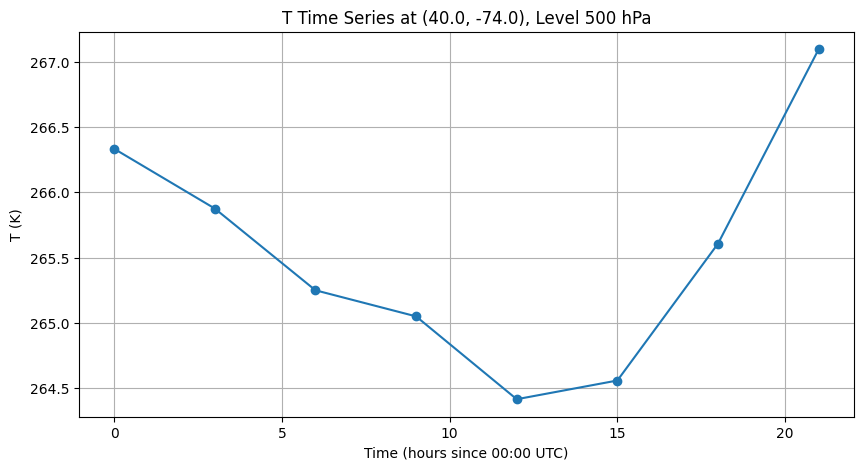

In [4]:
dataset = Dataset(file_path, mode='r')

# Choose a variable (e.g., Temperature at a mid-level pressure)
var_name = "T"  # Temperature
target_lat = 40.0  # Example: New York City
target_lon = -74.0  # Example: NYC
target_lev = 500  # Mid-level pressure (500 hPa)

# Find the closest grid indices
lat_idx = np.abs(dataset.variables['lat'][:] - target_lat).argmin()
lon_idx = np.abs(dataset.variables['lon'][:] - target_lon).argmin()
lev_idx = np.abs(dataset.variables['lev'][:] - target_lev).argmin()

# Extract time series data
time_series = dataset.variables[var_name][:, lev_idx, lat_idx, lon_idx]

# Convert time index to actual timestamps
time_steps = np.arange(len(time_series)) * 3  # Since intervals are 3-hourly

# Close dataset
dataset.close()

# Plot temperature time series
plt.figure(figsize=(10, 5))
plt.plot(time_steps, time_series, marker='o', linestyle='-')
plt.xlabel("Time (hours since 00:00 UTC)")
plt.ylabel(f"{var_name} (K)")
plt.title(f"{var_name} Time Series at ({target_lat}, {target_lon}), Level {target_lev} hPa")
plt.grid()
plt.show()

/opt/homebrew/anaconda3/envs/311_env/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/homebrew/anaconda3/envs/311_env/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


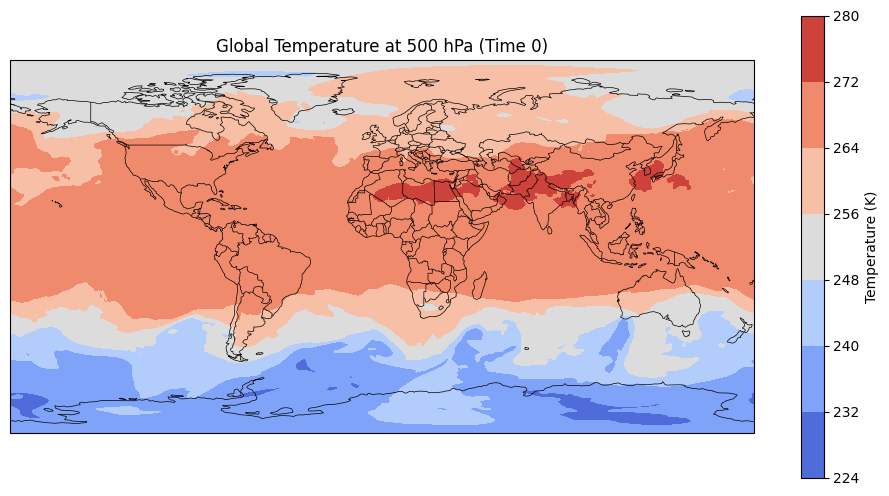

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

dataset = Dataset(file_path, mode='r')

# Extract temperature at a single level and time step
time_index = 0  # First time step
lev_index = np.abs(dataset.variables['lev'][:] - 500).argmin()  # 500 hPa level

temp_map = dataset.variables['T'][time_index, lev_index, :, :]  # Shape: (lat, lon)

# Get lat/lon
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

# Close dataset
dataset.close()

# Plot global temperature map
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lons, lats, temp_map, cmap="coolwarm", transform=ccrs.PlateCarree())
plt.colorbar(label="Temperature (K)")
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
plt.title(f"Global Temperature at 500 hPa (Time {time_index})")
plt.show()

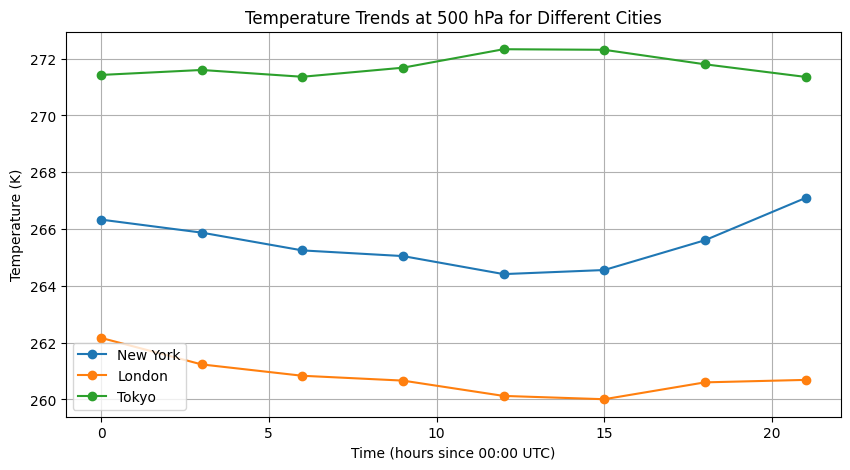

In [6]:
dataset = Dataset(file_path, mode='r')

# Define multiple locations (NYC, London, Tokyo)
locations = {"New York": (40.0, -74.0), "London": (51.5, -0.1), "Tokyo": (35.7, 139.7)}
lev_idx = np.abs(dataset.variables['lev'][:] - 500).argmin()  # 500 hPa level

# Initialize dictionary to store time series
location_temps = {}

for city, (lat, lon) in locations.items():
    lat_idx = np.abs(dataset.variables['lat'][:] - lat).argmin()
    lon_idx = np.abs(dataset.variables['lon'][:] - lon).argmin()
    location_temps[city] = dataset.variables['T'][:, lev_idx, lat_idx, lon_idx]

# Extract time steps
time_steps = np.arange(len(location_temps["New York"])) * 3  # 3-hour intervals

# Close dataset
dataset.close()

# Plot temperature trends for multiple locations
plt.figure(figsize=(10, 5))
for city, temp_series in location_temps.items():
    plt.plot(time_steps, temp_series, marker='o', linestyle='-', label=city)

plt.xlabel("Time (hours since 00:00 UTC)")
plt.ylabel("Temperature (K)")
plt.title("Temperature Trends at 500 hPa for Different Cities")
plt.legend()
plt.grid()
plt.show()